# step1: Import library and classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a dataset with 100 customer and 5 columns

In [2]:

np.random.seed(42)

data = {
    'CustomerID' : np.arange(1,101),
    'Age' : np.random.randint(18,50,size=100),
    'Average_spend' : np.random.uniform(5,50,size=100),
    'Visits_per_week' : np.random.uniform(1,7,size=100),
    'Promotion_Interest' : np.random.randint(1,11,size=100  )
}

#convert to a dataframe 
df = pd.DataFrame(data)
df

,CustomerID,Age,Average_spend,Visits_per_week,Promotion_Interest
0,1,24,48.631308,6.449595,5
1,2,37,39.880977,2.437371,7
2,3,46,47.277452,1.869369,1
3,4,32,45.267231,3.936717,3
4,5,28,31.905499,6.913903,2
...,...,...,...,...,...
95,96,39,6.659913,6.569911,7
96,97,27,32.430395,3.569105,5
97,98,21,27.620556,6.799929,6
98,99,39,7.316544,6.781720,7


# apply KMenas clustering to segment customers into 4 group

# Find Cluster Number

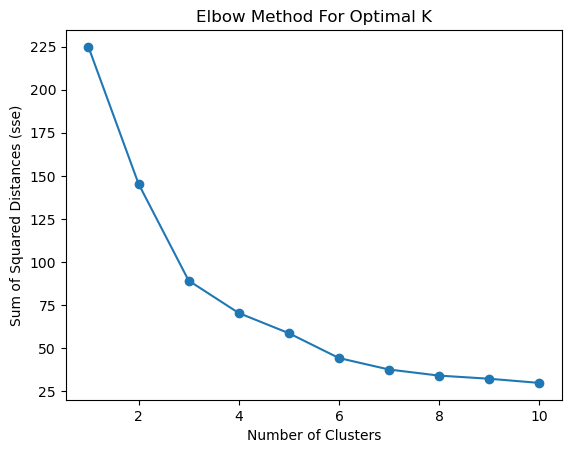

In [3]:
x = df[['Age','Average_spend','Visits_per_week','Promotion_Interest']]
# 2. Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x) 


#pca aply
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#elbo method to find optimal number of clusters

sse = []

k_range = range(1,11) #change this to range from 1 to 10 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_) #inertia_প্রতিটি পয়েন্ট থেকে তার ক্লাস্টার সেন্টারের দূরত্বের বর্গফলের যোগফল।


#plot the elbow curve
plt.plot(k_range,sse,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances (sse)")
plt.title("Elbow Method For Optimal K")
plt.show()


In [4]:
#we are clustering based on 'age','average_spend','visits_per_week',and,'promotaion'
features = df[['Age','Average_spend','Visits_per_week','Promotion_Interest']]

#initialize KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42) 

#fit the model 
df['cluster'] =  kmeans.fit_predict(features)

#Rename clusters to 
cluster_names = {
    0: 'Promotion',
    1: 'Weekend',
    2: 'Irregular',
    3: 'Daily'
}


df['Customer Group'] = df['cluster'].map(cluster_names)

df



,CustomerID,Age,Average_spend,Visits_per_week,Promotion_Interest,cluster,Customer Group
0,1,24,48.631308,6.449595,5,2,Irregular
1,2,37,39.880977,2.437371,7,0,Promotion
2,3,46,47.277452,1.869369,1,0,Promotion
3,4,32,45.267231,3.936717,3,2,Irregular
4,5,28,31.905499,6.913903,2,2,Irregular
...,...,...,...,...,...,...,...
95,96,39,6.659913,6.569911,7,1,Weekend
96,97,27,32.430395,3.569105,5,2,Irregular
97,98,21,27.620556,6.799929,6,3,Daily
98,99,39,7.316544,6.781720,7,1,Weekend


# Visualize the clusters using Age and Average Spend

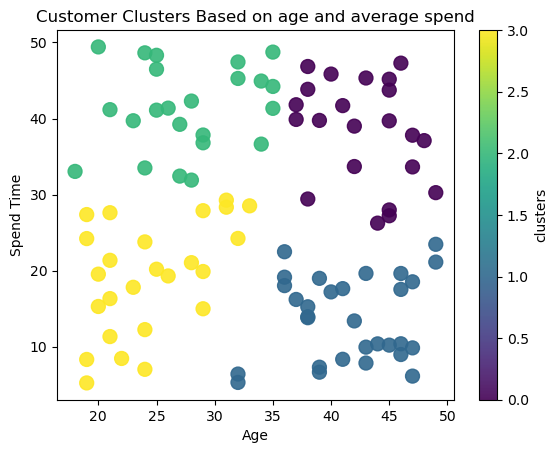

In [5]:
plt.scatter(df['Age'],df['Average_spend'],c=df['cluster'],cmap='viridis',marker='o',s=100,alpha=0.9)
plt.xlabel('Age')
plt.ylabel('Spend Time')
plt.title("Customer Clusters Based on age and average spend")
plt.colorbar(label='clusters')
plt.show()

# Evalute the clustering performance


In [6]:
#using silhouette  score (measures how similar a point is to its own cluster compared to other clusters)
print(silhouette_score(features,df['cluster']))


0.37640965991415476


# save Kmeans for future nference

In [7]:
import pickle

pickle.dump(kmeans,open("kmeans.pkl",'wb'))

In [8]:
kmeans = pickle.load(open('kmeans.pkl','rb'))

In [9]:
kmeans

KMeans(n_clusters=4, random_state=42)

# predict the cluster of a new customer

In [10]:
def clustering(age,avg_spend,visit_per_week,promotion_interest):
        #1st array te convert korte hobe 
        new_customer = np.array([[age,avg_spend,visit_per_week,promotion_interest]])
        
        #2nd train by model 
        predicted_cluster = kmeans.predict(new_customer)
        
        if  predicted_cluster[0] == 0:
            return "Promotion"
        elif  predicted_cluster[0] == 1:
            return "Irregular"
        elif  predicted_cluster[0] == 2:
            return "Weekend"
        else:
            return "Daily"
        
    
    


In [11]:
#new customer 

age = 41
avg_spend = 30
visit_per_week = 4
promotion_interest = 7
predicted_cluster = clustering(age,avg_spend,visit_per_week,promotion_interest)
print("New customer assigned to cluster :" , predicted_cluster)


New customer assigned to cluster : Promotion


/home/catpc/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [12]:
#new customer 

age = 40
avg_spend = 10
visit_per_week = 1
promotion_interest = 0
predicted_cluster = clustering(age,avg_spend,visit_per_week,promotion_interest)
print("New customer assigned to cluster :" , predicted_cluster)


New customer assigned to cluster : Irregular


/home/catpc/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [13]:
df['cluster'] = kmeans.labels_
df.groupby('cluster').mean(numeric_only=True)



,CustomerID,Age,Average_spend,Visits_per_week,Promotion_Interest
cluster,,,,,
0,44.636364,42.772727,38.327758,3.966204,6.045455
1,48.466667,41.500000,13.798210,4.073165,6.133333
2,45.826087,27.652174,41.381241,4.040503,4.652174
3,62.400000,24.400000,19.189354,4.305653,6.480000


In [14]:
#new customer 
age = 24
avg_spend = 19
visit_per_week = 4
promotion_interest = 6
predicted_cluster = clustering(age,avg_spend,visit_per_week,promotion_interest)
print("New customer assigned to cluster :" , predicted_cluster)


New customer assigned to cluster : Daily


/home/catpc/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
